<a href="https://colab.research.google.com/github/ashwantmanikoth/ML_WorkFlow/blob/main/Assignment2_tensorflow_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cat vs Dog image Classification
#1-Importing all the required libraries

In [3]:
!pip install transformers
!pip install datasets
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
import torch
import PIL
import tensorflow_datasets as tfds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00


# 2- Creating two models to compare the performances
# model 1 is Resnet50 and model 2 is VGG


In [31]:
import tensorflow as tf
import tensorflow_datasets as tfds

ds = tfds.load('cats_vs_dogs', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
# print(ds)
# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Preprocess the data
def preprocess(example):
    image = tf.image.resize(example['image'], (img_height, img_width))
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.per_image_standardization(image)
    return image, example['label']

ds = ds.map(preprocess)
ds = ds.take(5)#can be changed according system performance

# Load the pretrained ResNet-50 model
base_model = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',  # Pre-trained weights on ImageNet
    input_shape=(img_height, img_width, 3),
)

# Load the pretrained VGG16 model
comparison_model = tf.keras.applications.VGG16(
    include_top=True,
    weights='imagenet',  # Pre-trained weights on ImageNet
    input_shape=(img_height, img_width, 3),
)


# Making the Data from dataset to preprocess and pass down to model

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Create a list to store true labels and predicted labels
true_labels = []
predicted_labels = []
compare_labels=[]
for image, label in ds:
    # Expand dimensions to match model input shape (batch size of 1)
    image = tf.expand_dims(image, axis=0)

    # Perform inference and get predicted class probabilities
    predictions = base_model.predict(image)
    comparison = comparison_model.predict(image)
    # Get the predicted class label (index with the highest probability)
    predicted_label = tf.argmax(predictions, axis=-1).numpy()[0]%2
    compare_label = tf.argmax(comparison, axis=-1).numpy()[0]%2

    true_labels.append(label.numpy())
    predicted_labels.append(predicted_label)
    compare_labels.append(compare_label)

from sklearn.metrics import confusion_matrix
import numpy as np

# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)



1/1 [==============================] - 1s 595ms/step


# Creating 2 Confusion Matrix to show the comparison of the two pretrained Models

Confusion Matrix:


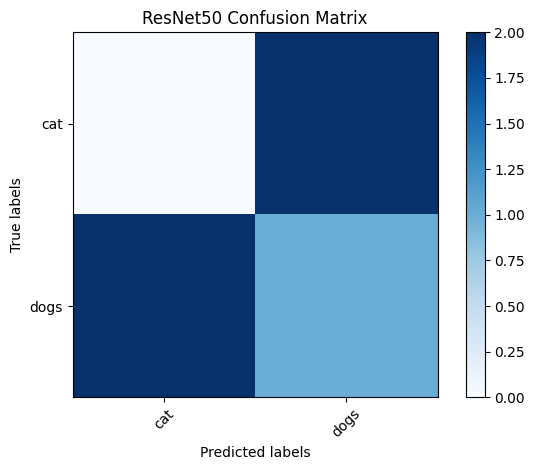

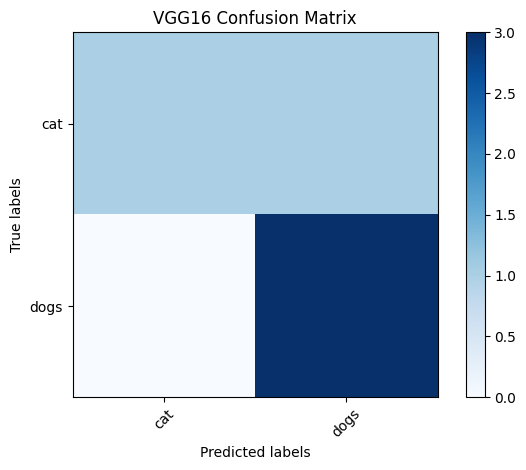

In [33]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)# model
ccm = confusion_matrix(true_labels, compare_labels)#comaprison model
print("Confusion Matrix:")
class_names =['cat','dogs']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('ResNet50 Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.tight_layout()
# Show the confusion matrix plot
plt.show()

plt.imshow(ccm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('VGG16 Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.tight_layout()
# Show the confusion matrix plot
plt.show()

# From the Comparsion from both model on the same data set the ResNet makes better predicitons compared to VGG model